In [33]:
from keras.datasets import mnist
from keras.utils import np_utils

# Loading Of MNIST Dataset & Preprocessing before Feeding to Keras CNN

(x_train,y_train), (x_test,y_test) = mnist.load_data()

img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0], img_rows,img_cols,1)

input_shape = (img_rows,img_cols,1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]
num_pixles = x_train.shape[1] * x_train.shape[2]

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras import backend as K
from keras.optimizers import SGD

# Building CNN 

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=input_shape))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss = 'categorical_crossentropy',
                 optimizer=SGD(0.01), metrics=['accuracy'])


In [35]:
# Training our Model

batch_size = 32
epochs = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 257s 4ms/step - loss: 0.5901 - accuracy: 0.8172 - val_loss: 0.1925 - val_accuracy: 0.9426
Epoch 2/10
60000/60000 [==============================] - 241s 4ms/step - loss: 0.2913 - accuracy: 0.9125 - val_loss: 0.1429 - val_accuracy: 0.9598
Epoch 3/10
60000/60000 [==============================] - 253s 4ms/step - loss: 0.2203 - accuracy: 0.9340 - val_loss: 0.1017 - val_accuracy: 0.9683
Epoch 4/10
60000/60000 [==============================] - 256s 4ms/step - loss: 0.1696 - accuracy: 0.9502 - val_loss: 0.0789 - val_accuracy: 0.9756
Epoch 5/10
60000/60000 [==============================] - 240s 4ms/step - loss: 0.1397 - accuracy: 0.9591 - val_loss: 0.0708 - val_accuracy: 0.9778
Epoch 6/10
60000/60000 [==============================] - 259s 4ms/step - loss: 0.1211 - accuracy: 0.9632 - val_loss: 0.0577 - val_accuracy: 0.9807
Epoch 7/10
60000/60000 [==============================] - 239s

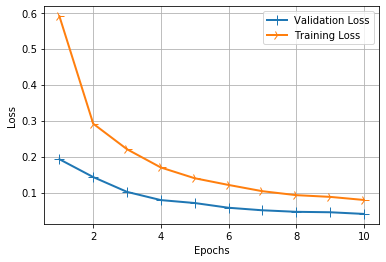

In [36]:
import matplotlib.pyplot as plt 

#Plot of Validatoin Loss & Training Loss

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation Loss')
line2 = plt.plot(epochs,loss_values, label= 'Training Loss')
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0 )
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


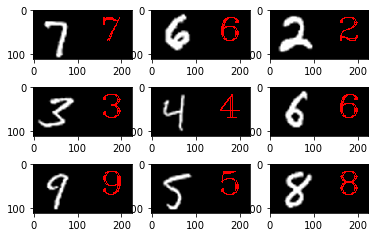

In [131]:

import cv2
import numpy as np

# Plots 9 Test images with Predicted Number


class count():
    def __init__(self):
        self.num = 330
    def get(self):
        self.num += 1
        return self.num
    
Count = count()

# Draw Predicted Number on Test Image
def draw_test(name, predic, input_image):
    black = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_image,0,0,0, imageR.shape[0], cv2.BORDER_CONSTANT, value=black)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    out = cv2.putText(expanded_image, str(predic), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (255,0,0), 2)
    x = Count.get()
    plt.subplot(x)
    imgplot = plt.imshow(out)
# Getting Random Test Image and Getting Pred
for i in range(0,9):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageR = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = str(model.predict_classes(input_im, 1, verbose = 0)[0])
    draw_test("Prediction", res, imageR) 
    
plt.show()
